In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.ticker as mticker
import time
import matplotlib.pyplot as plt
from tsf_dataloader import convert_tsf_to_dataframe
from IPython.display import display
import datetime
import matplotlib.colors
import zoneinfo


In [33]:
# Traffic hourly dataset
fn = "../data/time_series_datasets/rideshare_dataset_without_missing_values.tsf"
df = convert_tsf_to_dataframe(fn)[0]
display(df)

,series_name,source_location,provider_name,provider_service,type,start_timestamp,series_value
0,T0,Back Bay,Lyft,Lux,price_min,2018-11-26 06:00:00,"[11.0, 13.5, 13.5, 13.5, 13.5, 11.0, 10.5, 13...."
1,T1,Back Bay,Lyft,Lux,price_mean,2018-11-26 06:00:00,"[16.555555555555557, 17.3, 13.5, 17.9545454545..."
2,T2,Back Bay,Lyft,Lux,price_max,2018-11-26 06:00:00,"[22.5, 27.5, 13.5, 32.5, 26.0, 22.5, 22.5, 26...."
3,T3,Back Bay,Lyft,Lux,distance_min,2018-11-26 06:00:00,"[1.04, 1.09, 1.38, 1.39, 1.07, 1.03, 1.07, 1.0..."
4,T4,Back Bay,Lyft,Lux,distance_mean,2018-11-26 06:00:00,"[1.7266666666666666, 1.69, 1.38, 1.92090909090..."
...,...,...,...,...,...,...,...
2299,T2491,West End,Uber,WAV,temp,2018-11-26 06:00:00,"[40.56666666666667, 41.075, 0.0, 40.835, 40.62..."
2300,T2492,West End,Uber,WAV,rain,2018-11-26 06:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0026, 0...."
2301,T2493,West End,Uber,WAV,humidity,2018-11-26 06:00:00,"[0.92, 0.925, 0.0, 0.9299999999999999, 0.94, 0..."
2302,T2494,West End,Uber,WAV,clouds,2018-11-26 06:00:00,"[0.9906666666666667, 0.9675, 0.0, 1.0, 0.995, ..."


In [34]:
timeseries = list(df.loc[df['type']=='api_calls']["series_value"].apply(lambda x: list(x)))
timeseries = np.array(timeseries)

# setting up an array of timestamps
start_time = df['start_timestamp'][0]
start_timestamp = time.mktime(start_time.timetuple())
time_interval = 60*60 # 60 minutes
timeseries_len = timeseries.shape[1]
timestamp_arr = np.arange(int(start_timestamp), int(start_timestamp)+time_interval*timeseries_len, time_interval)
time_arr = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).replace(tzinfo=datetime.timezone.utc).astimezone(tz=zoneinfo.ZoneInfo(key="America/New_York")).strftime('%m-%d %H:%M') for timestamp in timestamp_arr])
weekdays_timestamps = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).replace(tzinfo=datetime.timezone.utc).astimezone(tz=zoneinfo.ZoneInfo(key="America/New_York")).weekday() for timestamp in timestamp_arr])
print(timeseries.shape)

(156, 541)


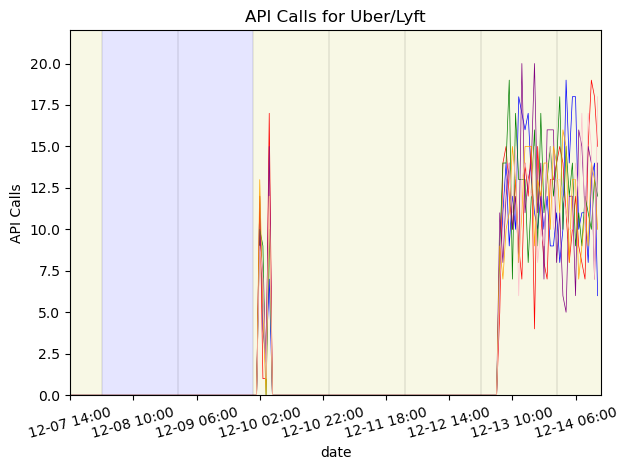

In [55]:
scale = 1

week_interval = 60*60*24*7
start_date = np.random.randint(0,timeseries_len-week_interval//time_interval)

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
plt.title("API Calls for Uber/Lyft")
ax.set_xlabel('date')
ax.set_ylabel(f'API Calls')

rand_ind = np.random.randint(0, timeseries.shape[0], 6)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0], start_date:start_date+week_interval//time_interval]/scale, c='blue', lw=0.5)
ln2, = ax.plot(timeseries[rand_ind[1], start_date:start_date+week_interval//time_interval]/scale, c='red', lw=0.5)
ln3, = ax.plot(timeseries[rand_ind[2], start_date:start_date+week_interval//time_interval]/scale, c='green', lw=0.5)
ln4, = ax.plot(timeseries[rand_ind[3], start_date:start_date+week_interval//time_interval]/scale, c='purple', lw=0.5)
ln5, = ax.plot(timeseries[rand_ind[4], start_date:start_date+week_interval//time_interval]/scale, c='orange', lw=0.5)
ln6, = ax.plot(timeseries[rand_ind[5], start_date:start_date+week_interval//time_interval]/scale, c='pink', lw=0.5)

cut_time_arr = time_arr[start_date:start_date+week_interval//time_interval]
# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return cut_time_arr[int(x)]
    except IndexError:
        return ''
    
cut_weekdays = weekdays_timestamps[start_date:start_date+week_interval//time_interval]
Z = np.repeat(cut_weekdays.reshape(1,cut_weekdays.shape[0]),int(ax.get_ylim()[1]+1),axis=0).reshape(int(ax.get_ylim()[1]+1),cut_weekdays.shape[0])
cvals = [0,1,2,3,4,5,6]
colors = ['y','y','y','y','y','b','b']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
c = ax.pcolor(Z, alpha=0.1, edgecolor=None, snap=True, cmap=cmap) 
ax.vlines(np.where(cut_weekdays[:-1] != cut_weekdays[1:])[0]+1,0,int(ax.get_ylim()[1]), colors='black', linewidth=0.1)

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()

In [232]:
# check for invariance within a 17 day span
timeseries_chunk = timeseries.reshape(timeseries.shape[0], timeseries.shape[1]//(17*24), 17*24)
timeseries_median = np.median(timeseries, axis=1)
timeseries_min_chunk = np.min(timeseries_chunk, axis=-1)
timeseries_max_chunk = np.max(timeseries_chunk, axis=-1)
timeseries_mean_chunk = np.mean(timeseries_chunk, axis=-1)
timeseries_std_chunk = np.std(timeseries_chunk, axis=-1)

# check std
timeseries_invariance = np.sum(timeseries_std_chunk > np.expand_dims(timeseries_median,1) * 2, axis=1) > 20
outliers = timeseries[timeseries_invariance]
print(outliers.shape)

(20, 17544)


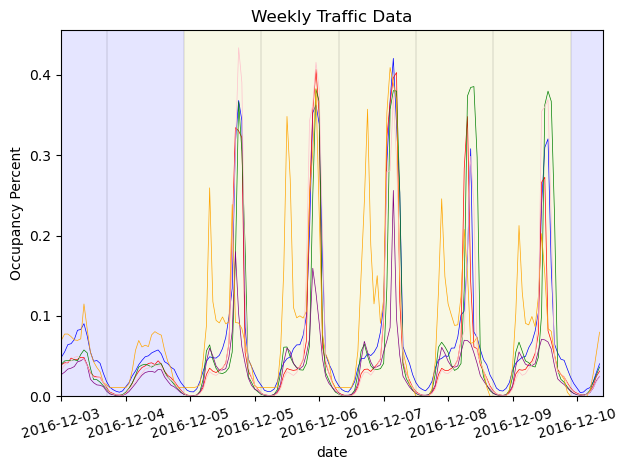

In [239]:
scale = 1

week_interval = 60*60*24*7
start_date = np.random.randint(0,timeseries_len-week_interval//time_interval)

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
plt.title("Weekly Traffic Data")
ax.set_xlabel('date')
ax.set_ylabel(f'Occupancy Percent')

rand_ind = np.random.randint(0, outliers.shape[0], 6)
# draw one line
ln1, = ax.plot(outliers[rand_ind[0], start_date:start_date+week_interval//time_interval]/scale, c='blue', lw=0.5)
ln2, = ax.plot(outliers[rand_ind[1], start_date:start_date+week_interval//time_interval]/scale, c='red', lw=0.5)
ln3, = ax.plot(outliers[rand_ind[2], start_date:start_date+week_interval//time_interval]/scale, c='green', lw=0.5)
ln4, = ax.plot(outliers[rand_ind[3], start_date:start_date+week_interval//time_interval]/scale, c='purple', lw=0.5)
ln5, = ax.plot(outliers[rand_ind[4], start_date:start_date+week_interval//time_interval]/scale, c='orange', lw=0.5)
ln6, = ax.plot(outliers[rand_ind[5], start_date:start_date+week_interval//time_interval]/scale, c='pink', lw=0.5)

cut_time_arr = time_arr[start_date:start_date+week_interval//time_interval]
# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return cut_time_arr[int(x)]
    except IndexError:
        return ''
    
cut_weekdays = weekdays_timestamps[start_date:start_date+week_interval//time_interval]
Z = np.repeat(cut_weekdays.reshape(1,cut_weekdays.shape[0]),int(ax.get_ylim()[1]+1),axis=0).reshape(int(ax.get_ylim()[1]+1),cut_weekdays.shape[0])
cvals = [0,1,2,3,4,5,6]
colors = ['y','y','y','y','y','b','b']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)
X=np.repeat(np.expand_dims(np.arange(week_interval//time_interval+1),0), 2, axis=0).reshape([2,week_interval//time_interval+1])
Y=np.zeros((week_interval//time_interval+1)*2).reshape([2,week_interval//time_interval+1])
Y[1] = ax.get_ylim()[1]
c = ax.pcolor(X, Y, Z, alpha=0.1, edgecolor=None, snap=True, cmap=cmap) 
ax.vlines(np.where(cut_weekdays[:-1] != cut_weekdays[1:])[0]+1,0,ax.get_ylim()[1], colors='black', linewidth=0.1)

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()